# Análise do dataset "Uterine Corpus Endometrial Carcinoma"

## Etapa 1:

O artigo aborda a caracterização genómica, transcriptómica e proteómica de 307 carcinomas endométricos. 
De acordo com o artigo as amostras foram retiradas de 373 pacientes, destas, 307 amostras correspondem a endometrial adenocarcinoma, 66 são serous endometrial adenocarcinoma e as restantes 13 são uma mistura das duas anteriores. No entanto, no dataset o número de amostras é 527 no total, sendo que 399 correspondem a 'Endometrioid Endometrial Adenocarcinoma', 109 são 'Serous Endometrial Adenocarcinoma' e os restantes 21 correspondem a 'Mixed Serous and Endometrioid Carcinoma'.

Os investigadores classificaram os carcinomas endométricos em quatro categorias:  'POLE ultramutated' (UCEC_POLE), 'microsatellite instability hypermutated' (UCEC_MSI), 'copy number low' (UCEC_CN_LOW) e 'copy number high' (UCEC_CN_HIGH). Concluiram também, que carcinomas serosos do útero  partilham características genómicas com o carcinoma seroso dos ovários e o carcinoma basal da mama. 


## Etapa 2: 

### Carregamento dos dados e metadados:

In [16]:
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn import preprocessing


%matplotlib inline

data_patient=pd.read_csv('data_clinical_patient.txt', sep='\t', header = 4)
data_sample=pd.read_csv('data_clinical_sample.txt', sep='\t',header = 4)

data_RNA = pd.read_csv('data_RNA_Seq_v2_expression_median.txt', sep='\t')

#data_sample

### Pré-processamento dos metadados:

In [17]:
data_sample.sort_values(by = ['PATIENT_ID'])
data_patient.sort_values(by = ['PATIENT_ID'])
data_sample['SUBTYPE'] = 'default value'

for i in range(len(data_sample['PATIENT_ID'])):
    if data_patient['PATIENT_ID'][i] == data_sample['PATIENT_ID'][i]:
        data_sample['SUBTYPE'] = data_patient['SUBTYPE']
    
#data_sample

### Verificar se há valores NA's:

In [18]:
data_RNA.isnull().sum().sum()

1070525

### Retirar os NA's:

In [19]:
data_RNA=data_RNA.dropna()
data_RNA.isnull().sum().sum()
print(data_RNA.shape)

(17494, 529)


### Descrição de algumas metricas dos dados:

In [ ]:
data_RNA.describe()

### Trim de colunas:

In [20]:
x_samples = []
for i in range(len(data_sample['SAMPLE_ID'])):
    x_samples.append(data_sample['SAMPLE_ID'][i])

x_data = []
for i in range(len(data_RNA.columns)):
    x_data.append(data_RNA.columns[i])

x_data.sort()
x_samples.sort()

set(x_samples)-set(x_data)

{'TCGA-AP-A0LQ-01', 'TCGA-EY-A1GJ-01'}

In [21]:
l = list(range(len(data_RNA.index)))
data_RNA.set_index([l], inplace = True)


In [22]:
data_trim=data_RNA.drop(columns = ["Hugo_Symbol"])

In [23]:
data_sample[data_sample['SAMPLE_ID']=='TCGA-AP-A0LQ-01'].index
data_sample.drop(data_sample.index[data_sample[data_sample['SAMPLE_ID']=='TCGA-AP-A0LQ-01'].index], inplace = True)

In [24]:
data_sample[data_sample['SAMPLE_ID']=='TCGA-EY-A1GJ-01'].index
data_sample.drop(data_sample.index[data_sample[data_sample['SAMPLE_ID']=='TCGA-EY-A1GJ-01'].index], inplace = True)

In [25]:
data_patient[data_patient['PATIENT_ID']=='TCGA-AP-A0LQ'].index
data_patient.drop(data_patient.index[data_patient[data_patient['PATIENT_ID']=='TCGA-AP-A0LQ'].index], inplace = True)

In [26]:
data_patient[data_patient['PATIENT_ID']=='TCGA-EY-A1GJ'].index
data_patient.drop(data_patient.index[data_patient[data_patient['PATIENT_ID']=='TCGA-EY-A1GJ'].index], inplace = True)

In [27]:
print(data_trim.shape)
print(data_sample.shape)

(17494, 528)
(527, 53)


### Normalização dos dados:

In [28]:
import numpy as np
data_gene = np.array(data_trim['Entrez_Gene_Id'])
data_t = data_trim.drop(columns = ['Entrez_Gene_Id'])
data_RNA_1 = preprocessing.scale(data_t)
data_all = pd.DataFrame(data_RNA_1, columns = data_t.columns)
data_all.shape

(17494, 527)

### Adicionar a coluna dos metadados ao dataset:

In [29]:
data_all_c = data_all.copy().transpose()
data_all_c.sort_index()
data_all_b = data_all.copy().transpose()
data_all_b.sort_index()
a = data_sample['CANCER_TYPE_DETAILED']
b = data_sample['SUBTYPE']
data_all_c['CANCER_DET'] = a.values
data_all_b['CANCER_SUB'] = b.values
data_all_b


,0,1,2,3,4,5,6,7,8,9,...,17485,17486,17487,17488,17489,17490,17491,17492,17493,CANCER_SUB
TCGA-2E-A9G8-01,-0.265437,-0.270850,-0.270967,-0.254109,1.237661,-0.268849,-0.188596,0.001917,-0.056096,-0.263083,...,0.026982,-0.264966,-0.218367,-0.030090,-0.258023,-0.109284,1.174178,-0.229782,-0.121875,UCEC_CN_HIGH
TCGA-4E-A92E-01,-0.315839,-0.321774,-0.321365,-0.272522,3.609268,-0.298169,0.060142,-0.091724,-0.061023,-0.321228,...,-0.125154,-0.299533,-0.179050,0.009794,-0.321365,-0.113419,0.839393,0.058913,-0.052700,UCEC_CN_LOW
TCGA-5B-A90C-01,-0.340378,-0.343235,-0.342822,-0.318773,0.929263,-0.323613,-0.029079,-0.028149,-0.145674,-0.343235,...,0.087412,-0.334354,-0.281787,0.014297,-0.339001,-0.108496,1.003857,-0.224781,0.013471,UCEC_CN_HIGH
TCGA-5S-A9Q8-01,-0.260477,-0.276136,-0.276136,-0.257653,0.870224,-0.269506,0.118097,0.266600,-0.021121,-0.276136,...,-0.116586,-0.273484,-0.227961,-0.042336,-0.271716,-0.178903,0.314772,-0.071947,-0.106863,UCEC_CN_LOW
TCGA-A5-A1OH-01,-0.256232,-0.331695,-0.331026,-0.259853,1.924777,-0.329577,-0.259671,0.181057,-0.152304,-0.270932,...,0.099335,-0.327012,-0.268144,0.137576,-0.319096,-0.120083,0.786686,-0.160220,-0.140263,UCEC_POLE
TCGA-A5-A2K2-01,-0.295557,-0.336019,-0.336019,-0.305282,0.747281,-0.334751,0.199290,-0.082709,-0.112352,-0.330471,...,0.130021,-0.310498,-0.171796,0.074856,-0.319216,-0.141361,0.334031,-0.096184,-0.068126,UCEC_POLE
TCGA-A5-A2K3-01,-0.068665,-0.104029,-0.104098,-0.091622,0.523203,-0.104098,-0.027102,-0.015128,-0.061423,-0.104098,...,-0.043601,-0.102915,-0.090941,-0.048265,-0.103472,-0.087390,0.537979,-0.051328,-0.084188,NaN
TCGA-A5-A2K4-01,-0.318605,-0.339704,-0.339534,-0.305245,2.101402,-0.339023,0.685887,-0.096343,-0.113726,-0.339023,...,0.046127,-0.327945,-0.219898,0.061467,-0.309199,-0.060044,1.345587,-0.086118,-0.044024,UCEC_CN_HIGH
TCGA-A5-A2K5-01,-0.208864,-0.238331,-0.238331,-0.202197,0.864713,-0.236490,-0.167805,0.097833,0.090791,-0.235298,...,-0.008335,-0.235515,-0.220239,-0.100962,-0.238331,-0.186439,0.763445,-0.149280,-0.203556,UCEC_MSI
TCGA-A5-A2K7-01,-0.262713,-0.289056,-0.288933,-0.248272,0.617703,-0.284237,0.157034,0.105876,-0.016337,-0.272992,...,0.216843,-0.284113,-0.226900,-0.045375,-0.288562,-0.131009,1.448719,-0.125201,-0.175000,UCEC_MSI


### Verificar se há NA's no Dataset total:

In [30]:
data_all_b.isnull().sum().sum()


21

### Retirar os NA's do Dataset total:

In [31]:
data_all_b=data_all_b.dropna()
print(data_all_b.isnull().sum().sum())
data_all_b.shape

0


(506, 17495)

O nosso dataset (data_RNA) contém dados de expressão de RNA e é composto por 20531 linhas (genes) e 529 colunas ("Hugo_Symbol", "Entrez_Gene_Id" e 527 samples), originalmente. Este dataset é composto por 527 atributos numéricos, uma vez que as duas primeiras colunas são o "Hugo_Symbol" e o "Entrez_Gene_Id". Relativamente aos metadados, temos dois dataframes, um para os dados dos pacientes ("data_patient") e outro para os dados das amostras ("data_sample").
O dataset "data_patient" é composto por 38 atributos quantitativos continuos (por exemplo "AGE"), atributos qualitativos nominais (por exemplo "SEX") , enquanto que o data_sample tem 52 atributos nominais (por exemplo "CANCER_TYPE_DETAILED") e atributos ordinais (por exemplo "GRADE").

Em primeiro lugar carregamos os três dataframes: "data_RNA", "data_sample" e "data_paciente". De seguida, como o dataset não tinha a mesma ordem que os dados dos metadados, foi necessário organizar os metadados de forma a que fosse mais fácil trabalhar com os três dataframes (foi feita uma ordenação por ordem alfabética) . O próximo passo foram verificar a existência de NA's e retirá-los do dataset "data_RNA". No próximo passo, verificamos que existiam inconsistências no número das samples dos datasets, o dataset "data_RNA" tinha duas amostras a menos que os metadados, portanto foi necessário descobrir quais as amostras a mais e retirá-las dos metadados. Depois guardamos um array com as informações dos genes e retiramos duas colunas que não iam ser necessárias na análise ("Hugo_Symbol" e "Entrez_Gene_Id"). Uma vez que estamos a utilizar um dataset que não tem qualquer tipo de transformação foi necessario fazer a normalização dos dados. Visto que existem dois tipos de classificações, a inicial utilizada convencionalmente e a nova classificação descrita pelo artigo, o passo seguinte foi colocar as samples em linhas e os genes em colunas e adicionar a coluna "CANCER_DET" e "CANCER_SUB" respetivamente dos metadados ao dataset, para nos facilitar todas as análises futuras. Por fim, retiramos os NA's ao dataset que continha valores de metadados em falta. No final obtivémos dois datasets, mais especificamente, "data_all_c" com os valores dos genes e uma coluna de metadados "CANCER_DET" por cada sample e "data_all_b" com os valores dos genes e uma coluna "CANCER_SUB" por cada sample.

### Gráficos exploratórios:

Neste ponto foram feitos alguns gráficos exploratórios para avaliar a consistência dos dados do dataset com os dados do artigo e do site.
Os gráficos mais pertinentes estão abaixo apresentados.

#### Status geral da sobrevivência:

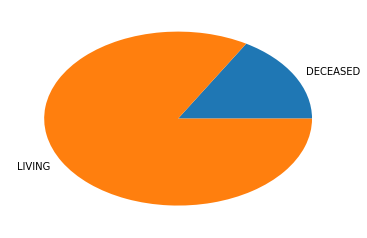

OS_STATUS
DECEASED     87
LIVING      440
Name: PATIENT_ID, dtype: int64

In [20]:
stat_status = data_patient.groupby(['OS_STATUS']).count()
fig, ax1 = plt.subplots()
labels = 'DECEASED','LIVING'
ax1.pie(stat_status['PATIENT_ID'],labels = labels)

plt.show()
stat_status['PATIENT_ID']

#### Raça:

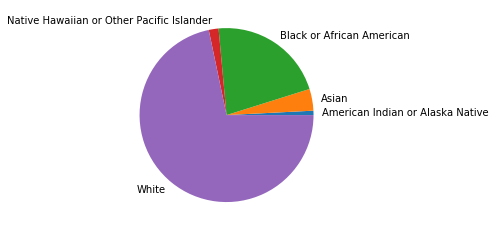

RACE
American Indian or Alaska Native               4
Asian                                         20
Black or African American                    107
Native Hawaiian or Other Pacific Islander      9
White                                        355
Name: PATIENT_ID, dtype: int64

In [82]:
stat_race = data_patient.groupby(['RACE']).count()
fig, ax1 = plt.subplots()
labels = 'American Indian or Alaska Native','Asian','Black or African American', 'Native Hawaiian or Other Pacific Islander','White' 
ax1.pie(stat_race['PATIENT_ID'], labels = labels)
plt.show()
stat_race['PATIENT_ID']

#### Subtipo de cancro:

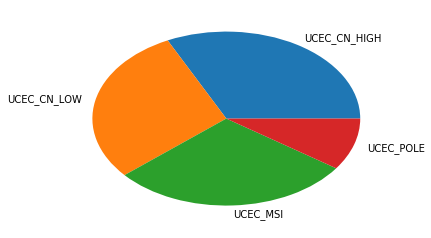

SUBTYPE
UCEC_CN_HIGH    163
UCEC_CN_LOW     147
UCEC_MSI        147
UCEC_POLE        49
Name: PATIENT_ID, dtype: int64

In [23]:
stat_SUBTYPE = data_patient.groupby(['SUBTYPE']).count()
fig, ax1 = plt.subplots()
labels = 'UCEC_CN_HIGH','UCEC_CN_LOW', 'UCEC_MSI', 'UCEC_POLE'
ax1.pie(stat_SUBTYPE['PATIENT_ID'], labels= labels)
plt.show()
stat_SUBTYPE['PATIENT_ID']

#### Tipo de tumor:

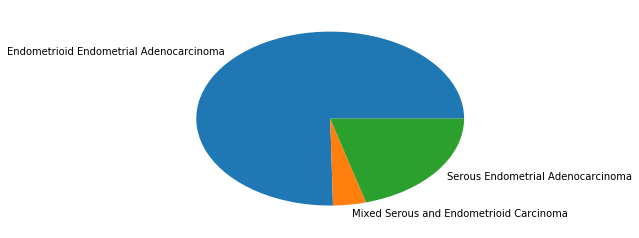

TUMOR_TYPE
Endometrioid Endometrial Adenocarcinoma    397
Mixed Serous and Endometrioid Carcinoma     21
Serous Endometrial Adenocarcinoma          109
Name: PATIENT_ID, dtype: int64

In [24]:
stat_tum_type = data_sample.groupby(['TUMOR_TYPE']).count()
fig, ax1 = plt.subplots()
labels= 'Endometrioid Endometrial Adenocarcinoma','Mixed Serous and Endometrioid Carcinoma','Serous Endometrial Adenocarcinoma'
ax1.pie(stat_tum_type['PATIENT_ID'],labels = labels)
plt.show()
stat_tum_type['PATIENT_ID']

#### Status 10p:

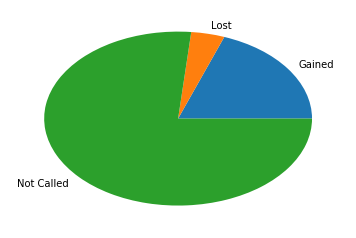

STATUS_10P
Gained         96
Lost           20
Not Called    379
Name: PATIENT_ID, dtype: int64

In [25]:
stat_STATUS_10P = data_sample.groupby(['STATUS_10P']).count()
fig, ax1 = plt.subplots()
labels='Gained','Lost','Not Called'
ax1.pie(stat_STATUS_10P['PATIENT_ID'],labels = labels)
plt.show()
stat_STATUS_10P['PATIENT_ID']

#### Status 10q:

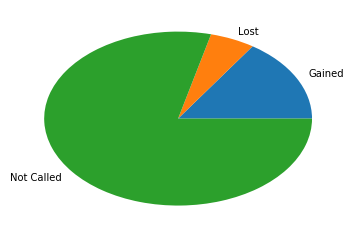

STATUS_10Q
Gained         69
Lost           24
Not Called    349
Name: PATIENT_ID, dtype: int64

In [26]:
stat_STATUS_10Q = data_sample.groupby(['STATUS_10Q']).count()
fig, ax1 = plt.subplots()
labels='Gained','Lost','Not Called'
ax1.pie(stat_STATUS_10Q['PATIENT_ID'],labels = labels)
plt.show()
stat_STATUS_10Q['PATIENT_ID']

#### Histograma da idade dos pacientes:

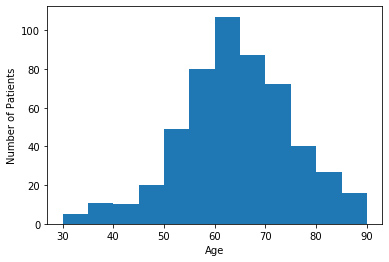

63.7557251908397

In [32]:
plt.hist(x=data_patient['AGE'],  bins=[30,35,40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90], range=[30,90])
plt.ylabel('Number of Patients')
plt.xlabel('Age')
plt.show()
data_patient['AGE'].mean()

## Etapa 3: Análise inferencial/ estatística univariada

In [34]:
from scipy import stats
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

### QQ plots:

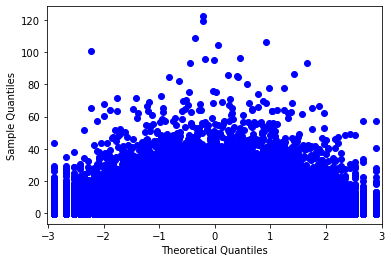

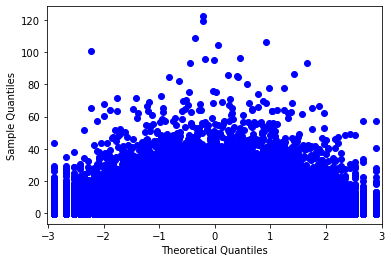

In [35]:
sm.qqplot(data_all_c.iloc[:,:-1])

### Teste Shapiro: 

In [36]:
w, p_value = stats.shapiro(data_all_c.iloc[:,:-1])
w, p_value

(0.25504904985427856, 0.0)

H0: Os dados seguem uma distribuição normal.

H1: Os dados não seguem uma distribuição normal.

Visto que não se observa a representação de uma linha na diagonal apartir do qqplot e que se obtém um valor de p-value inferior a 0.05 no teste de shapiro, rejeita-se H0. 
Assume-se então, a partir de agora, que os dados não seguem uma distribuição normal, por isso os testes realizados serão não paramétricos.



#### Sub-divisao do dataset pelos metadados para ser possível fazer uma comparaçao entre as diferentes amostras:

In [37]:
data_endo = data_all_c[data_all_c['CANCER_DET']== 'Uterine Endometrioid Carcinoma']
data_serous = data_all_c[data_all_c['CANCER_DET']== 'Uterine Serous Carcinoma/Uterine Papillary Serous Carcinoma']
data_mixed = data_all_c[data_all_c['CANCER_DET']== 'Uterine Mixed Endometrial Carcinoma']


### Teste de Teste de Kruskal-Wallis:

In [38]:
stats.kruskal(data_endo.iloc[:,:-1], data_serous.iloc[:,:-1], data_mixed.iloc[:,:-1])

KruskalResult(statistic=528327597972.84357, pvalue=0.0)

#### Sub-divisao do dataset pelos metadados para ser possível fazer uma comparaçao entre as diferentes amostras.

In [40]:
data_cn_high = data_all_b[data_all_b['CANCER_SUB']== 'UCEC_CN_HIGH']
data_cn_low = data_all_b[data_all_b['CANCER_SUB']== 'UCEC_CN_LOW'] 
data_pole = data_all_b[data_all_b['CANCER_SUB']== 'UCEC_POLE'] 
data_msi= data_all_b[data_all_b['CANCER_SUB']== 'UCEC_MSI']

### Teste Kruskal-Wallis:

In [41]:
stats.kruskal(data_cn_high.iloc[:,:-1], data_cn_low.iloc[:,:-1], data_pole.iloc[:,:-1], data_msi.iloc[:,:-1])

KruskalResult(statistic=515250599179.8202, pvalue=0.0)

H0: As variâncias das populações são as mesmas.

H1: As variâncias das populações não são as mesmas.

Para ambos os testes,uma vez que o valor de p-value obtido é inferior a 0.05, concluimos que as diferenças entre, pelo menos, algumas das variâncias são estatisticamente significativas a um nível de significância de 95%.

Estes dados enfatizam a existência de diferenças nas amostras obtidas para cada um dos grupos de estudo.

## Análise Fold Change 


In [43]:
def differential_expression(data, group_col, features, reference=None):
    if group_col not in data.columns:
        raise ValueError("`group_col` {} not found in data".format(group_col))
    if any([x not in data.columns for x in features]):
        raise ValueError("Not all provided features found in data.")
    if reference is None:
        reference = data[group_col].unique()[0]
        print("No reference group provided. Using {}".format(reference))
    elif reference not in data[group_col].unique():
        raise ValueError("Reference value {} not found in column {}.".format(
                         reference, group_col))
    by_group = data.groupby(group_col)
    reference_avg = by_group.get_group(reference).loc[:,features].mean()
    values = []
    results = {}
    for each, index in by_group.groups.items():
        values.append(data.loc[index, features])
        if each !=  reference:
            key = "{}.FoldChange".format(each)
            results[key] = data.loc[index, features].mean()\
                         / reference_avg
    fold_change_cols = list(results.keys())
    fvalues, pvalues = stats.kruskal(*values)
    results['f.value'] = fvalues
    results['p.value'] = pvalues
    results['p.value.adj'] = pvalues * len(features)
    results_df = pd.DataFrame(results)
    def largest_deviation(x):
        i = np.where(abs(x) == max(abs(x)))[0][0]
        return x[i]
    results_df['Max.FoldChange'] = results_df[fold_change_cols].apply(
                                       lambda x: largest_deviation(x.values), axis=1)

    return results_df

#### Lista com todos os genes mais os metadados:

In [44]:
t=list(data_all_b.columns)
t=t[:-1]


In [45]:
change_fold_endo=differential_expression(data_all_c ,'CANCER_DET',t, 'Uterine Endometrioid Carcinoma')
change_fold_serous=differential_expression(data_all_c ,'CANCER_DET',t, 'Uterine Serous Carcinoma/Uterine Papillary Serous Carcinoma')
change_fold_mixed=differential_expression(data_all_c ,'CANCER_DET',t, 'Uterine Mixed Endometrial Carcinoma')

In [46]:
change_fold_cn_high=differential_expression(data_all_b ,'CANCER_SUB',t, 'UCEC_CN_HIGH')
change_fold_cn_low=differential_expression(data_all_b ,'CANCER_SUB',t, 'UCEC_CN_LOW')
change_fold_pole=differential_expression(data_all_b ,'CANCER_SUB',t, 'UCEC_POLE')
change_fold_msi=differential_expression(data_all_b ,'CANCER_SUB',t, 'UCEC_MSI')


In [47]:
change_fold_endo
diff_endo=change_fold_endo.sort_values(by='Max.FoldChange',ascending =False)
top10_sobre=diff_endo.index[:10]
top10_sub=diff_endo.index[-10:]

#### Lista de genes mais expressos nos outros tipos de cancros em relaçao a Uterine Endometrioid Carcinoma:

In [48]:
lista_sobrexpressos=[]

for i in top10_sobre:
    lista_sobrexpressos.append(data_RNA['Hugo_Symbol'][i])
lista_sobrexpressos

['FAM49B',
 'GDA',
 'STEAP3',
 'SPOP',
 'TLE2',
 'CES2',
 'FBXL19',
 'PHF1',
 'POLD1',
 'HERC2P2']

FAM49B, STEAP3, SPOP, CES2, FBXL19, PHF1 e POLD1 foram mais sobreexpressos em Uterine Mixed Endometrial Carcinoma em relação a Uterine Endometrioid Carcinoma.
GDA, TLE2, e HERC2P2 foram mais sobreexpressos em Uterine Serous Carcinoma/Uterine Papillary Serous Carcinoma  em relação a Uterine Endometrioid Carcinoma.

#### Lista de genes menos expressos nos outros tipos de cancros em relaçao a Uterine Endometrioid Carcinoma:

In [49]:
lista_subexpressos=[]
for i in top10_sub:
    lista_subexpressos.append(data_RNA['Hugo_Symbol'][i])
lista_subexpressos

['CEP350',
 'DACT2',
 'RARRES2',
 'ZFP106',
 'ST3GAL1',
 'RGL3',
 'ARVCF',
 'C2orf68',
 'LMBR1',
 'MUC4']

Todos os genes referidos na lista foram mais subexpressos em Uterine Mixed Endometrial Carcinoma (em relação a Uterine Endometrioid Carcinoma) do que em Uterine Serous Carcinoma/Uterine Papillary Serous Carcinoma (em relação a Uterine Endometrioid Carcinoma).

In [50]:
change_fold_serous
diff_serous=change_fold_serous.sort_values(by='Max.FoldChange',ascending =False)
top10_sobre=diff_serous.index[:10]
top10_sub=diff_serous.index[-10:]

#### Lista de genes mais expressos nos outros tipos de cancros em relaçao a Uterine Serous Carcinoma/Uterine Papillary Serous Carcinoma:

In [51]:
lista_sobrexpressos=[]

for i in top10_sobre:
    lista_sobrexpressos.append(data_RNA['Hugo_Symbol'][i])
lista_sobrexpressos

['ZXDC',
 'CADM4',
 'GMPS',
 'MRPL27',
 'COX15',
 'ERCC5',
 'DSC2',
 'KIFC1',
 'PRNP',
 'RCOR1']

Todos os genes referidos na lista foram mais sobreexpressos em Uterine Mixed Endometrial Carcinoma (em relação a Uterine Serous Carcinoma/Uterine Papillary Serous Carcinoma) do que em Uterine Endometrioid Carcinoma (em relação a Uterine Serous Carcinoma/Uterine Papillary Serous Carcinoma).

#### Lista de genes menos expressos nos outros tipos de cancros em relaçao a Uterine Serous Carcinoma/Uterine Papillary Serous Carcinoma:

In [52]:
lista_subexpressos=[]
for i in top10_sub:
    lista_subexpressos.append(data_RNA['Hugo_Symbol'][i])
lista_subexpressos

['ETFA',
 'ARHGAP21',
 'PTTG1',
 'NDUFC1',
 'RRP1',
 'SEPT8',
 'DNAJA4',
 'RRN3',
 'SLC35F5',
 'INO80E']

ARHGAP21 e RRN3 foram mais subexpressos em Uterine Endometrioid Carcinoma em relação a Uterine Serous Carcinoma/Uterine Papillary Serous Carcinoma.
ETFA, PTTG1, NDUFC1, RRP1, SEPT8, DNAJA4, SLC35F5 e INO80E foram mais subexpressos em Uterine Mixed Endometrial Carcinoma em relação a Uterine Serous Carcinoma/Uterine Papillary Serous Carcinoma.

In [53]:
change_fold_mixed
diff_mixed=change_fold_mixed.sort_values(by='Max.FoldChange',ascending =False)
top10_sobre=diff_mixed.index[:10]
top10_sub=diff_mixed.index[-10:]

#### Lista de genes mais expressos nos outros tipos de cancros em relaçao a Uterine Mixed Endometrial Carcinoma:

In [54]:
lista_sobrexpressos=[]

for i in top10_sobre:
    lista_sobrexpressos.append(data_RNA['Hugo_Symbol'][i])
lista_sobrexpressos

['NCRNA00201',
 'BAMBI',
 'CCNB1IP1',
 'TMEM101',
 'FAM174B',
 'LRG1',
 'CREB3L4',
 'TMUB1',
 'PPP1R13L',
 'DAPK3']

CCNB1IP1, CREB3L4 e TMUB1 foram mais sobreexpressos em Uterine Endometrioid Carcinoma em relação a Uterine Mixed Endometrial Carcinoma.
NCRNA00201, BAMBI, TMEM101, FAM174B, LRG1, PPP1R13L e DAPK3 foram mais sobreexpressos em Uterine Serous Carcinoma/Uterine Papillary Serous Carcinoma  em relação a Uterine Mixed Endometrial Carcinoma.

#### Lista de genes menos expressos nos outros tipos de cancros em relaçao a Uterine Mixed Endometrial Carcinoma:

In [55]:
lista_subexpressos=[]
for i in top10_sub:
    lista_subexpressos.append(data_RNA['Hugo_Symbol'][i])
lista_subexpressos

['RNF43',
 'C1orf128',
 'WDR5',
 'SIK3',
 'GATAD1',
 'EPT1',
 'TNFRSF6B',
 'DOCK1',
 'DDRGK1',
 'NDUFA4L2']

WDR5, EPT1 e DDRGK1 foram mais subexpressos em Uterine Endometrioid Carcinoma em relação a Uterine Mixed Endometrial Carcinoma.
RNF43, C1orf128, SIK3, GATAD1, TNFRSF6B, DDRGK1 e NDUFA4L2 foram mais subexpressos em Uterine Serous Carcinoma/Uterine Papillary Serous Carcinoma  em relação a Uterine Mixed Endometrial Carcinoma.

In [56]:
change_fold_cn_high
diff_cn_high=change_fold_cn_high.sort_values(by='Max.FoldChange',ascending =False)
top10_sobre=diff_cn_high.index[:10]
top10_sub=diff_cn_high.index[-10:]

#### Lista de genes mais expressos nos outros tipos de metadados em relaçao a UCEC_CN_HIGH:

In [57]:
lista_sobrexpressos=[]

for i in top10_sobre:
    lista_sobrexpressos.append(data_RNA['Hugo_Symbol'][i])
lista_sobrexpressos

['JAG2',
 'HDHD3',
 'RHBDD3',
 'CCNB1IP1',
 'CARS',
 'MGST1',
 'SLC27A4',
 'OLFM4',
 'POLD1',
 'TPCN1']

CCNB1IP1, MGST1 e TPCN1 formam mais sobreexpressos em UCEC_CN_LOW em relação a UCEC_CN_HIGH.
CARS e OLFM4 formam mais sobreexpressos em UCEC_MSI em relação a UCEC_CN_HIGH.
JAG2, HDHD3, RHBDD3, MGST1, SLC27A4 e POLD1 formam mais sobreexpressos em UCEC_POLE em relação a UCEC_CN_HIGH.

#### Lista de genes menos expressos nos outros tipos de metadados em relaçao a UCEC_CN_HIGH:

In [58]:
lista_subexpressos=[]
for i in top10_sub:
    lista_subexpressos.append(data_RNA['Hugo_Symbol'][i])
lista_subexpressos

['KIF12',
 'COPS3',
 'ARHGAP29',
 'ADM',
 'URB1',
 'CLK3',
 'EPT1',
 'GOLIM4',
 'HMGCL',
 'AMPD2']

COPS3, ARHGAP29, GOLIM4 e AMPD2 formam mais subexpressos em UCEC_CN_LOW em relação a UCEC_CN_HIGH.
URB1 e HMGCL formam mais subexpressos em UCEC_MSI em relação a UCEC_CN_HIGH.
KIF12, ADM, URB1, CLK3 e EPT1 formam mais subexpressos em UCEC_POLE em relação a UCEC_CN_HIGH.

In [59]:
change_fold_cn_low
diff_cn_low=change_fold_cn_low.sort_values(by='Max.FoldChange',ascending =False)
top10_sobre=diff_cn_low.index[:10]
top10_sub=diff_cn_low.index[-10:]

#### Lista de genes mais expressos nos outros tipos de metadados em relaçao a  UCEC_CN_LOW:

In [60]:
lista_sobrexpressos=[]

for i in top10_sobre:
    lista_sobrexpressos.append(data_RNA['Hugo_Symbol'][i])
lista_sobrexpressos

['GRAMD4',
 'MLX',
 'SLC7A8',
 'PEX2',
 'S100A9',
 'TNRC6A',
 'DEFB1',
 'MAPKSP1',
 'SPSB3',
 'CSRNP1']

GRAMD4, MAPKSP1 e SPSB3 foram mais sobreexpressos em UCEC_CN_HIGH em relação a UCEC_CN_LOW.
SLC7A8, S100A9, TNRC6A e DEFB1 foram mais sobreexpressos em UCEC_MSI em relação a UCEC_CN_LOW.
MLX, PEX2 e CSRNP1 foram mais sobreexpressos em UCEC_POLE em relação a UCEC_CN_LOW.

#### Lista de genes menos expressos nos outros tipos de metadados em relaçao a  UCEC_CN_LOW:

In [61]:
lista_subexpressos=[]
for i in top10_sub:
    lista_subexpressos.append(data_RNA['Hugo_Symbol'][i])
lista_subexpressos

['GALNT11',
 'SELM',
 'TP53BP2',
 'PSMD11',
 'SYNJ2BP',
 'C14orf119',
 'SLC20A2',
 'ELN',
 'ACP5',
 'OSBPL8']

SYNJ2BP e C14orf119 foram mais subexpressos em UCEC_CN_HIGH em relação a UCEC_CN_LOW.
TP53BP2, SLC20A2, ELN, ACP5 e OSBPL8  foram mais subexpressos em UCEC_MSI em relação a UCEC_CN_LOW.
GALNT11, SELM e PSMD11foram mais subexpressos em UCEC_POLE em relação a UCEC_CN_LOW.

In [63]:
change_fold_pole
diff_pole=change_fold_pole.sort_values(by='Max.FoldChange',ascending =False)
top10_sobre=diff_pole.index[:10]
top10_sub=diff_pole.index[-10:]

#### Lista de genes mais expressos nos outros tipos de metadados em relaçao a UCEC_POLE:

In [64]:
lista_sobrexpressos=[]

for i in top10_sobre:
    lista_sobrexpressos.append(data_RNA['Hugo_Symbol'][i])
lista_sobrexpressos

['C22orf30',
 'TSIX',
 'TAF10',
 'TGFBR1',
 'RFK',
 'SYTL1',
 'SEMA3B',
 'SRXN1',
 'TP53INP1',
 'S100A14']

TAF10, TGFBR1, RFK e SYTL1 foram mais sobreexpressos em UCEC_CN_HIGH em relação a UCEC_POLE.
SEMA3B e S100A14 foram mais sobreexpressos em UCEC_CN_LOW em relação a UCEC_POLE.
C22orf30, TSIX, SRXN1 e TP53INP1 foram mais sobreexpressos em UCEC_MSI em relação a UCEC_POLE.

#### Lista de genes menos expressos nos outros tipos de metadados em relaçao a UCEC_POLE:

In [65]:
lista_subexpressos=[]
for i in top10_sub:
    lista_subexpressos.append(data_RNA['Hugo_Symbol'][i])
lista_subexpressos

['MRPL55',
 'BCL2L11',
 'C7orf28A',
 'PVR',
 'C16orf13',
 'TCF4',
 'IER5L',
 'MRPL23',
 'MAP2K7',
 'COPS3']

MRPL55, PVR, C16orf13, IER5L, MRPL23 e MAP2K7 foram mais subexpressos em UCEC_CN_HIGH em relação a UCEC_POLE.
BCL2L11, C7orf28A e COPS3 foram mais subexpressos em UCEC_CN_LOW em relação a UCEC_POLE..
TCF4 foi mais subexpressos em UCEC_MSI em relação a UCEC_POLE.

In [66]:
change_fold_msi
diff_msi=change_fold_msi.sort_values(by='Max.FoldChange',ascending =False)
top10_sobre=diff_msi.index[:10]
top10_sub=diff_msi.index[-10:]

#### Lista de genes mais expressos nos outros tipos de metadados em relaçao a UCEC_MSI:

In [67]:
lista_sobrexpressos=[]

for i in top10_sobre:
    lista_sobrexpressos.append(data_RNA['Hugo_Symbol'][i])
lista_sobrexpressos

['MMP9',
 'C11orf49',
 'INO80E',
 'HOOK1',
 'KRT6A',
 'WIPF2',
 'DPY30',
 'DACT2',
 'RFC1',
 'MICAL2']

HOOK1 e RFC1 foram mais sobreexpressos em UCEC_CN_HIGH em relação a UCEC_MSI.
MMP9, C11orf49, INO80E, KRT6A, WIPF2 e MICAL2 foram mais sobreexpressos em UCEC_CN_LOW em relação a UCEC_MSI.
DPY30 e DACT2 foram mais sobreexpressos em UCEC_POLE em relação a UCEC_MSI.

#### Lista de genes menos expressos nos outros tipos de metadados em relaçao a UCEC_MSI:

In [68]:
lista_subexpressos=[]
for i in top10_sub:
    lista_subexpressos.append(data_RNA['Hugo_Symbol'][i])
lista_subexpressos

['BACE1',
 'HEATR1',
 'SUV420H1',
 'F3',
 'TACC2',
 'PREP',
 'C1orf186',
 'BTN3A2',
 'HP',
 'PLAT']

BACE1, F3, TACC2, HP e PLAT foram mais subexpressos em UCEC_CN_HIGH em relação a UCEC_MSI.
C1orf186 foi mais subexpressos em UCEC_CN_LOW em relação a UCEC_MSI.
HEATR1, SUV420H1, PREP e BTN3A2 foram mais subexpressos em UCEC_POLE em relação a UCEC_MSI.

## Etapa 4: Redução de dimensionalidade

### PCA:

[0.08766854 0.08050388 0.06143148 0.05073685 0.04323084 0.04015578
 0.03675657 0.02967816 0.02779954 0.02665861]
0.4846202438730703


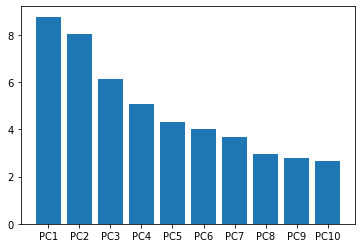

In [90]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

n=10
pca=PCA(n_components=n)
pca.fit(data_all_c.iloc[ : ,:-1])
x_reduced=pca.transform(data_all_c.iloc[ : ,:-1])
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())
plt.bar(range(n), pca.explained_variance_ratio_*100)
plt.xticks(range(n), ['PC' + str(i) for i in range(1, n+1)])
plt.show()

0.48309979906204065
[0.08678782 0.07986293 0.06200016 0.04996659 0.0441072  0.04008402
 0.03622654 0.03031508 0.02753182 0.02621764]


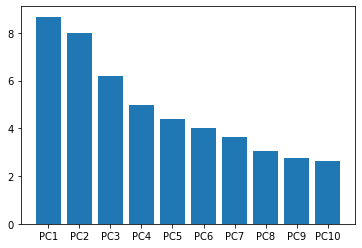

In [91]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

n=10
pca_2=PCA(n_components=n)
pca_2.fit(data_all_b.iloc[ : ,:-1])
x_reduced_2=pca_2.transform(data_all_b.iloc[ : ,:-1])
print(pca_2.explained_variance_ratio_.sum())
print(pca_2.explained_variance_ratio_)

plt.bar(range(n), pca_2.explained_variance_ratio_*100)
plt.xticks(range(n), ['PC' + str(i) for i in range(1, n+1)])
plt.show()

#### Scater Plot do PCA:

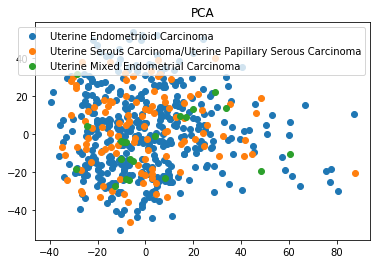

In [86]:
d_ind = data_all_c.copy()
l = list(range(len(data_all_c.index)))
d_ind.set_index([l], inplace = True)
for s in d_ind['CANCER_DET'].unique():
    sp = d_ind.index[d_ind['CANCER_DET']==s]-1
    plt.plot(x_reduced[sp,0],x_reduced[sp,1], 'o' , label=s)
plt.title("PCA")
plt.legend(loc='best', shadow=False)
plt.show()


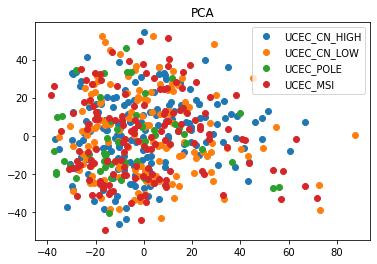

In [87]:
d_ind_2 = data_all_b.copy()
l_2 = list(range(len(data_all_b.index)))
d_ind_2.set_index([l_2], inplace = True)
for s in d_ind_2['CANCER_SUB'].unique():
    sp = d_ind_2.index[d_ind_2['CANCER_SUB']==s]-1
    plt.plot(x_reduced_2[sp,0],x_reduced_2[sp,1], 'o' , label=s)
plt.title("PCA")
plt.legend(loc='best', shadow=False)
plt.show()

Na nossa análise fizemos PCA's para os dois datasets, em ambas utilizamos 10 componentes. Os resultados foram bastante semelhantes, onde os 10 primeiros componentes explicam apenas 48.3% da variabilidade das amostras para o dataset data_all_c e 48.5% da variabilidade das amostras para o dataset data_all_b. 

Para visualizar melhor os resultados fizemos um scatter plot para cada pca de cada dataset onde se comprova que as amostras não se agrupam de forma alguma.

Uma conclusão que se pode retirar destes resultados é que os dados não são facilmente separáveis e que estes valores de metadados não conseguem separar os dados por diferentes áreas.

## Etapa 5: Clustering

### Clustering Hierarchical:

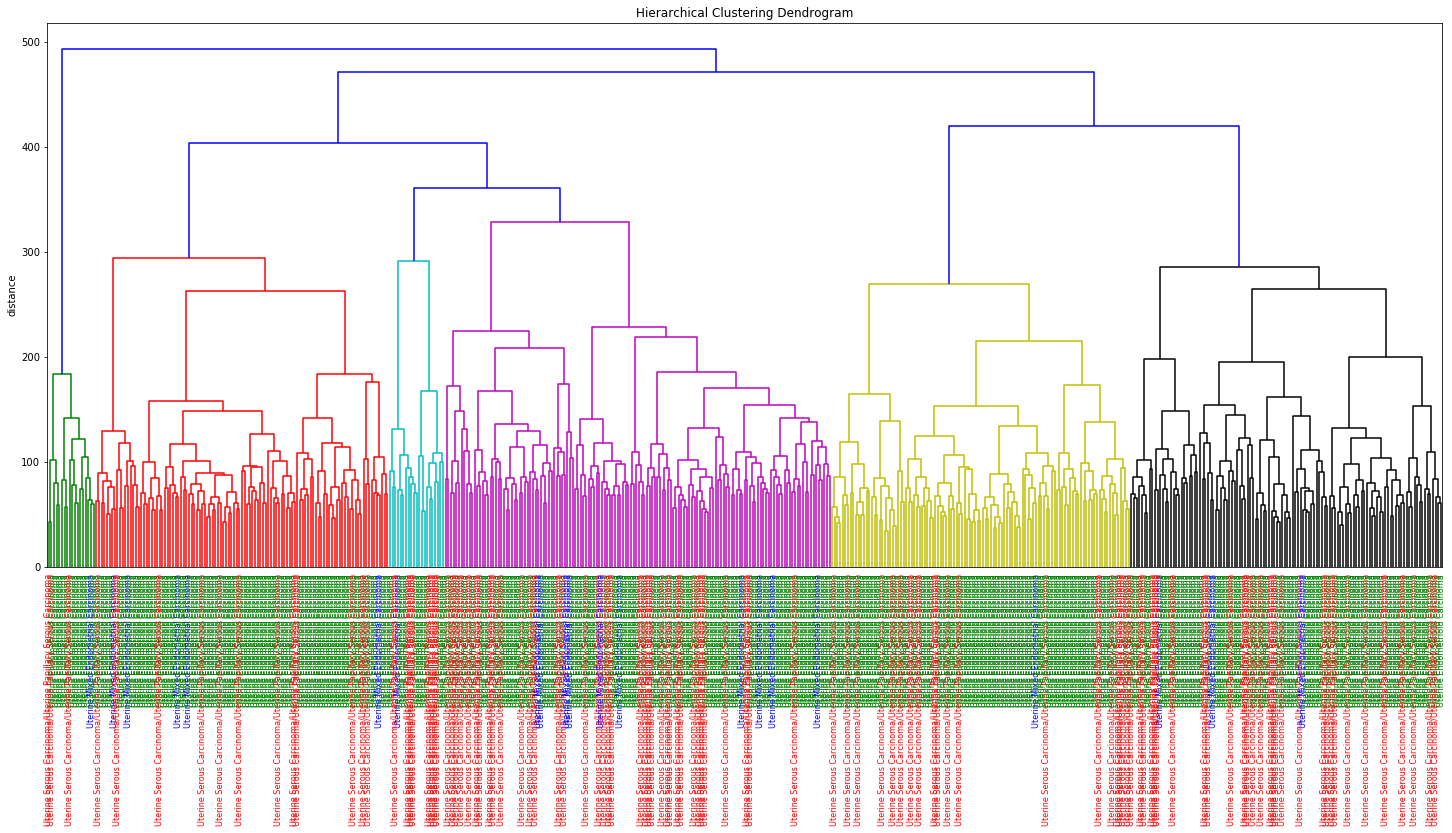

In [73]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(data_all_c.iloc[:,:-1], method='ward', metric='euclidean')

plt.figure(figsize=(25, 10))
dendrogram(
    Z,
    labels=list(data_all_c.iloc[:,-1]),
    leaf_rotation=90.,  
    leaf_font_size=8.,  
)

plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('distance')

label_colors = {'Uterine Serous Carcinoma/Uterine Papillary Serous Carcinoma': 'r', 'Uterine Endometrioid Carcinoma': 'g', 'Uterine Mixed Endometrial Carcinoma': 'b'}
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for lbl in xlbls:
    lbl.set_color(label_colors[lbl.get_text()])

plt.show()

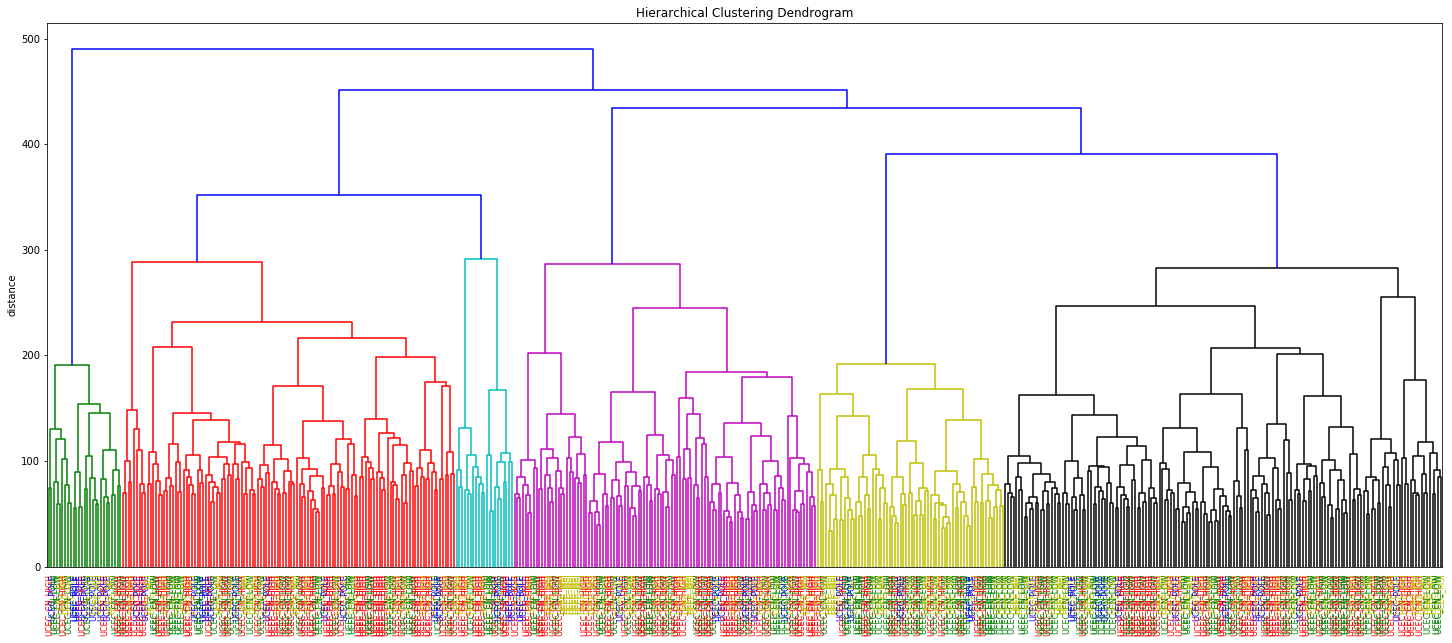

In [74]:
Z = linkage(data_all_b.iloc[:,:-1], method='ward', metric='euclidean')

plt.figure(figsize=(25, 10))
dendrogram(
    Z,
    labels=list(data_all_b.iloc[:,-1]),
    leaf_rotation=90.,  
    leaf_font_size=8.,  
)

plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('distance')

label_colors = {'UCEC_CN_HIGH': 'r', 'UCEC_CN_LOW': 'g', 'UCEC_POLE': 'b', 'UCEC_MSI': 'y'}
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for lbl in xlbls:
    lbl.set_color(label_colors[lbl.get_text()])

plt.show()

No artigo os autores realizaram clustering hierárquico não supervisionado, que agrupou as amostras em 4 grupos diferentes. Os três primeiros clusters eram constítuidos quase exclusivamente (97%) por carcinoma endométricos. 

Tal como no artigo, utilizamos clustering hierárquico não supervisionado com o método ward e a métrica euclideana.

Podemos observar que em ambos os casos os dados foram divididos em 6 clusters bem definidos. No entanto, quando atribuimos os nomes dos metadados aos dados verificamos que a divisão dos clusters nao está feita consoante os metadados.

Quando comparamos os resultados obtidos com os resultados obtidos no artigo (Supplementary	Methods	S9) podemos comprovar que com os metadados analisados e com a informação fornecida não é possivel fazer uma divisão correta. Os 4 clusters, falados no artigo que conseguem dividir os dados corretamente, foram feitos de acordo com outras divisões de metadados. Para além disso foram feitos por uma ferramenta (SuperCluster) de cluster diferente às que foram utilizadas neste trabalho, não sabendo se usam as mesmas metricas nessa ferramenta ou não.

Assim, podemos concluir que os valores dos metadados não são os mais adquados para separar as amostras. Possivelmente uma junção de vários metadados seria uma solução melhor para separar as samples dos pacientes.


### Kmeans

#### Find the appropriate cluster number:

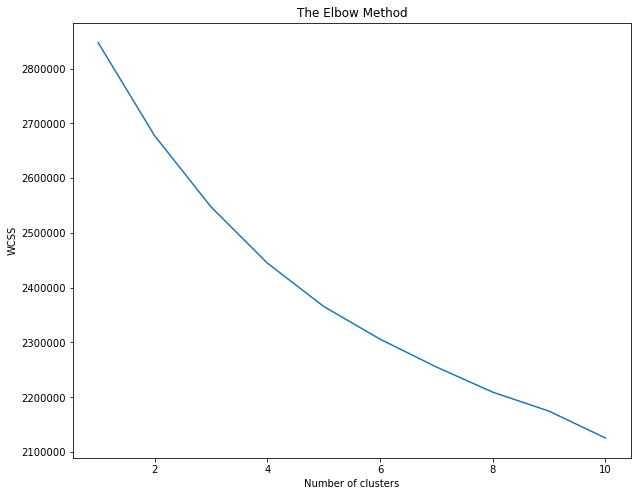

In [75]:
plt.figure(figsize=(10, 8))
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(data_all_c.iloc[ : ,:-1])
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#### Matriz de confusão:

In [76]:
from sklearn.cluster import KMeans
import numpy as np

k=4
kmeans_data = KMeans(n_clusters=k, max_iter=1000)
kmeans_data.fit(data_all_c.iloc[ : ,:-1])
labels = kmeans_data.labels_
centroids = kmeans_data.cluster_centers_

pd.crosstab(labels,data_all_c["CANCER_DET"], rownames=['clusters'] )


CANCER_DET,Uterine Endometrioid Carcinoma,Uterine Mixed Endometrial Carcinoma,Uterine Serous Carcinoma/Uterine Papillary Serous Carcinoma
clusters,,,
0,21,1,6
1,117,2,35
2,157,12,38
3,102,6,30


####  Find the appropriate cluster number:


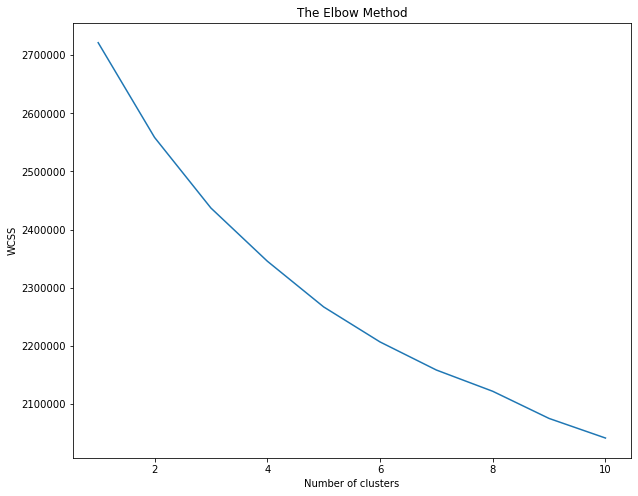

In [77]:
plt.figure(figsize=(10, 8))
wcss_2 = []
for i in range(1, 11):
    kmeans_2 = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_2.fit(data_all_b.iloc[ : ,:-1])
    wcss_2.append(kmeans_2.inertia_)
plt.plot(range(1, 11), wcss_2)#### Matriz de confusão:
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#### Matriz de confusão:

In [79]:
kmeans_data_2 = KMeans(n_clusters=k, max_iter=1000)
kmeans_data_2.fit(data_all_b.iloc[ : ,:-1])
labels_2 = kmeans_data_2.labels_
centroids_2 = kmeans_data_2.cluster_centers_

pd.crosstab(labels,data_all_b["CANCER_SUB"], rownames=['clusters'])

CANCER_SUB,UCEC_CN_HIGH,UCEC_CN_LOW,UCEC_MSI,UCEC_POLE
clusters,,,,
0,47,41,35,9
1,52,57,38,13
2,6,5,9,7
3,58,44,65,20


#### Scatter plot:

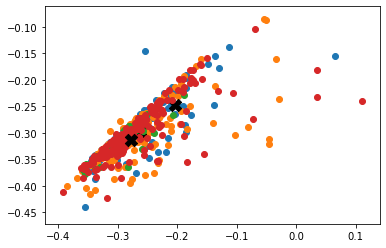

In [80]:
X = data_all_c.iloc[ : ,:-1].copy()
X.reset_index(drop = True,inplace = True )
arr = np.array(X)
for i in range(k):
    ds = arr[np.where(labels==i)]
    plt.scatter(ds[:,0],ds[:,1],cmap = "nipy_spectral")
    lines = plt.scatter(centroids[i,0],centroids[i,1], c = 'black', marker = 'X', s =150)  
plt.show()

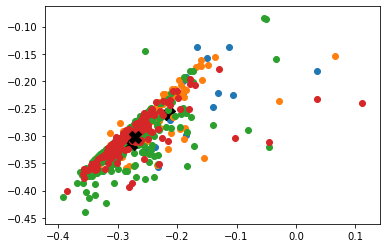

In [81]:
X = data_all_b.iloc[ : ,:-1].copy()
X.reset_index(drop = True,inplace = True )
arr = np.array(X)
for i in range(k):
    ds = arr[np.where(labels_2==i)]
    plt.scatter(ds[:,0],ds[:,1],cmap = "nipy_spectral")
    lines = plt.scatter(centroids_2[i,0],centroids_2[i,1], c = 'black', marker = 'X', s =150)  
plt.show()

Primeiramente , para realizar o K-means, calculamos qual o número de clusters apropriados, utilizando o "Elbow Method" para cada dataset, sendo que os resultados não foram, de todo, conclusivos. Neste método, o valor de inertia tende para 0 quando enquanto aumentamos o número de cluster, escolhendo o número de clusters onde a diminuição da inertia compensa o aumento dos clusters. Através da análise dos nossos dados podemos comprovar que o valor de inertia para os clusters que aparecem ainda não está perto de 0. Mesmo assim escolhemos 4 como número de clusters.

Através dos scatter plot podemos observar que para ambos os datasets os centroids estão proximos uns dos outros e que as amostras estão próximas umas das outras. Isto comprova o que foi dito acima. O número de clusters não é suficiente para dividir as amostras de modo efectivo. Para além disso, podemos sugerir que este tipo de metadados não é suficiente para separar as amostras.